In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# machine learning
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline


In [2]:
titanic_train = pd.read_csv('../titanic_train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(titanic_train.shape)

(891, 12)


In [4]:
#Preliminary analysis of the different types of variables available
# Continuous: Age, Fare
# Discrete: SibSp, Parch
# Categorical: Survived, Sex, Embarked
# Ordinal: Pclass
# Mixed: Ticket
# Alphanumeric: Cabin

# Lets get some info from the training data
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
# Lets identify the features with missing values
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# We observe that Age, Cabin and Embarked have many missing values and hence its better to drop these

In [9]:
# Find out frequency of each value of Predictor variable - Survived  
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
# As per the above output, majority of the people didnt survive

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

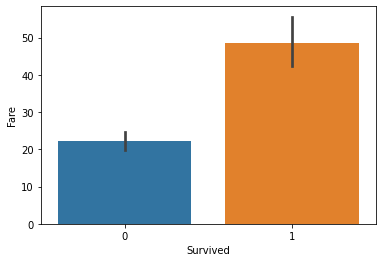

In [11]:
# Plot of survival vs fare price
sns.barplot(x='Survived', y='Fare', data=titanic_train)

In [12]:
# Above plot shows that Passengers paying high fare had higher chances of survival

In [13]:
# Number male and female passengers
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

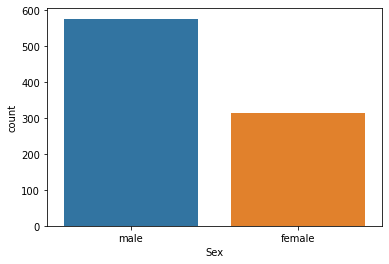

In [14]:
sns.countplot(x='Sex', data=titanic_train)

In [15]:
# As per the above plots, there were more Male than Female

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

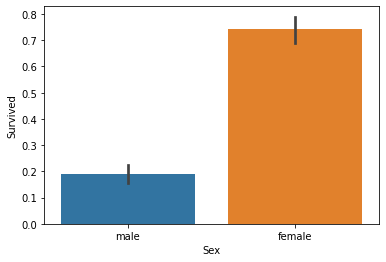

In [16]:
# Survival based on sex
sns.barplot(x='Sex', y='Survived', data=titanic_train)

In [17]:
# Above plot shows that Female passengers survived more than the Male

In [18]:
titanic_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
# Number of Passengers on various Pclass
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
# Above output shows that Pclass = 3 had maximum passengers

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

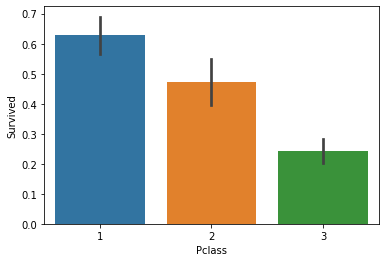

In [21]:
# Survival on the basis of Pclass
sns.barplot(x='Pclass', y='Survived', data=titanic_train)

In [22]:
# Although Pclass = 3 had maximum passengers, number of survivors were less

In [23]:
# % of passengers survived in each class
titanic_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Age', ylabel='Count'>

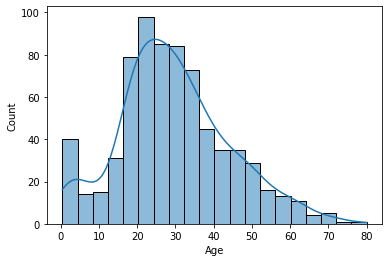

In [24]:
# Histogram plot of age
sns.histplot(data = titanic_train['Age'], kde = True)

In [25]:
# From the above plot, it appears that the majority of passengers were in the age group of 15-35

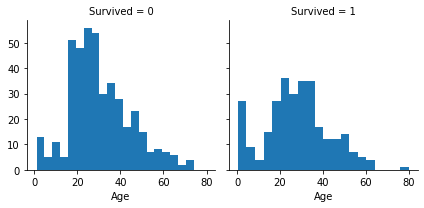

In [26]:
#Lets do a plot of age vs survival
g = sns.FacetGrid(titanic_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [27]:
# Observations from the above plot
# 1. Infants (Age <= 4 yrs) had high survival rate
# 2. Oldest passengers (Age = 80) survived
# 3. Large number of passengers in Age range 15-25 did not survive


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

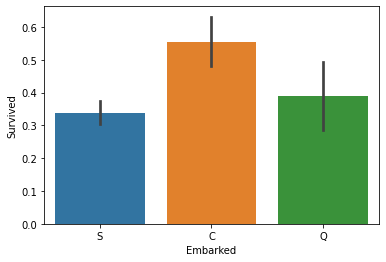

In [28]:
# Lets check survival based on Embarked
sns.barplot(x='Embarked', y='Survived', data=titanic_train)

In [29]:
titanic_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [30]:
# Lets check the correlation among various numerical variables
titanic_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

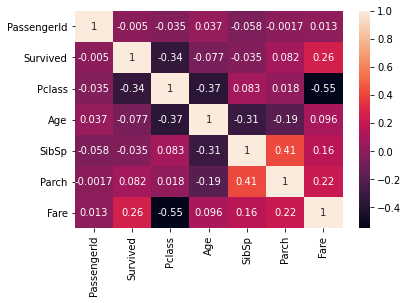

In [31]:
sns.heatmap(titanic_train.corr(), annot=True)

In [32]:
# Lets summarize the assumptions based on the analysis done so far

# 1. We need to impute the missing Age values since there is quite a good number of Age values not known
# 2. We need to impute the missing Embarked values as well
# 3. Cabin too has many missing values.  Hence can be dropped
# 4. Upon analysis of Ticket, there are many duplicates, hence can be dropped
# 5. Passenger ID may not be helpful.  Hence can be dropped
# 6. SibSp and Parch dont provide useful info, hence can be dropped

In [33]:
# Data Cleaning
titanic_train.drop(['Name', 'Cabin', 'PassengerId', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)

In [34]:
# impute the missing age values with the mean 
titanic_train['Age'].fillna(value=titanic_train['Age'].mean(), inplace=True)

In [35]:
# drop the  observations having missing Embarked (as only 2 of them are missing)
titanic_train.dropna(axis=0, inplace=True)

In [36]:
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [37]:
# Feature Engineering

titanic_train.loc[ titanic_train['Age'] <= 16, 'Age'] = 0
titanic_train.loc[(titanic_train['Age'] > 16) & (titanic_train['Age'] <= 32), 'Age'] = 1
titanic_train.loc[(titanic_train['Age'] > 32) & (titanic_train['Age'] <= 48), 'Age'] = 2
titanic_train.loc[(titanic_train['Age'] > 48) & (titanic_train['Age'] <= 64), 'Age'] = 3
titanic_train.loc[ titanic_train['Age'] > 64, 'Age']

33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

In [38]:
# Age is a continuous variable.  We can convert this numerical feature into an ordinary categorical feature
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,1.0,7.2500,S
1,1,1,female,2.0,71.2833,C
2,1,3,female,1.0,7.9250,S
3,1,1,female,2.0,53.1000,S
4,0,3,male,2.0,8.0500,S


In [39]:
X_train = titanic_train.iloc[:, 1:].values
y_train = titanic_train.iloc[:, :1].values.ravel()
print(X_train.shape)
print(y_train.shape)

(889, 5)
(889,)


In [40]:
# Encoding the Sex variable
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X_train = columnTransformer.fit_transform(X_train)


In [41]:
# Encoding the Emberked variable
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_train = columnTransformer.fit_transform(X_train)


In [42]:
X_train.shape

(889, 8)

In [43]:
X_train

array([[0.0, 0.0, 1.0, ..., 3, 1.0, 7.25],
       [1.0, 0.0, 0.0, ..., 1, 2.0, 71.2833],
       [0.0, 0.0, 1.0, ..., 3, 1.0, 7.925],
       ...,
       [0.0, 0.0, 1.0, ..., 3, 1.0, 23.45],
       [1.0, 0.0, 0.0, ..., 1, 1.0, 30.0],
       [0.0, 1.0, 0.0, ..., 3, 1.0, 7.75]], dtype=object)

In [44]:
# Modelling

# 1. Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

68.39

In [45]:
# 2. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

85.26

In [46]:
# 3. Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

77.95

In [47]:
# 4. Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

93.03

In [48]:
# 5. Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

93.03

In [49]:
# Evaluation
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)
models.to_csv("ModelResult.csv")

In [50]:
# Conclusion
# Based on the above evaluation, Random Forest and Decision Tree prove to be the best suited models